# Preprocessing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import json

pd.set_option("display.max_columns", 100)
pd.set_option("display.max_rows", 101)

In [2]:
xqrs = pd.read_csv('../to_csv/final_dataset/xqrs_filtered_v2.csv')
xqrs.head()

,Key,hf,lf_hf_ratio,vlf,max_hr,lf,cvi,sd1,min_hr,sd2,sampen,median_nni,mean_hr,mean_nni,csi,Modified_csi,label
0,train_01_tcp_ar_7793_s001_2011_05_27_t001,NaN,NaN,NaN,127.118644,NaN,NaN,NaN,105.633803,NaN,NaN,506.0,118.490493,507.8,NaN,NaN,0.000
1,train_01_tcp_ar_7793_s001_2011_05_27_t001,NaN,NaN,NaN,120.000000,NaN,NaN,NaN,118.110236,NaN,NaN,504.0,119.049198,504.0,NaN,NaN,0.016
2,train_01_tcp_ar_7793_s001_2011_05_27_t001,NaN,NaN,NaN,120.967742,NaN,NaN,NaN,118.110236,NaN,NaN,502.0,119.532917,502.0,NaN,NaN,1.000
3,train_01_tcp_ar_7793_s001_2011_05_27_t001,NaN,NaN,NaN,120.967742,NaN,NaN,NaN,116.279070,NaN,NaN,512.0,117.713266,509.8,NaN,NaN,1.000
4,train_01_tcp_ar_7793_s001_2011_05_27_t001,NaN,NaN,NaN,120.967742,NaN,NaN,NaN,118.110236,NaN,NaN,504.0,118.816291,505.0,NaN,NaN,1.000


In [3]:
xqrs_filtered = xqrs.replace([np.inf, -np.inf], np.nan)

In [4]:
xqrs_clean_imputed = xqrs_filtered.groupby(xqrs_filtered['Key']).transform(lambda x: x.fillna(x.mean()))
xqrs_clean_imputed.insert(0, 'Key', xqrs_filtered.Key)
xqrs_clean_imputed = xqrs_clean_imputed.reset_index().drop(['index'], axis=1)

In [5]:
xqrs_clean_imputed.label = xqrs_clean_imputed.label.apply(lambda x: 1 if x != 0 else 0)

In [6]:
xqrs_clean_imputed.label.value_counts(normalize=True) * 100

0    69.185041
1    30.814959
Name: label, dtype: float64

In [7]:
xqrs_clean_imputed[xqrs_clean_imputed.isnull().any(axis=1)].Key.unique()

array([], dtype=object)

In [8]:
from functions import series_to_supervised, supervised_by_exam

In [9]:
xqrs_clean_lag_10 = supervised_by_exam(xqrs_clean_imputed, 1)
xqrs_clean_lag_120 = supervised_by_exam(xqrs_clean_imputed, 12)

In [10]:
xqrs_clean_lag_240 = supervised_by_exam(xqrs_clean_imputed, 24)

In [11]:
xqrs_clean_lag_60 = supervised_by_exam(xqrs_clean_imputed, 6)
xqrs_clean_lag_30 = supervised_by_exam(xqrs_clean_imputed, 3)

In [12]:
import re

def reg(text):
    r = re.search(r'_(\d+)_s', text)
    if r:
        return r.group(1)

In [13]:
patients = set(xqrs_clean_imputed.Key.apply(reg))
len(patients)

86

# Vizualisations

## Patient 9578

### First test no lag

In [14]:
xqrs_clean_imputed[xqrs_clean_imputed.Key.str.contains('9578')].groupby('Key').agg('count')

,hf,lf_hf_ratio,vlf,max_hr,lf,cvi,sd1,min_hr,sd2,sampen,median_nni,mean_hr,mean_nni,csi,Modified_csi,label
Key,,,,,,,,,,,,,,,,
dev_01_tcp_ar_9578_s004_2013_03_01_t001,101,101,101,101,101,101,101,101,101,101,101,101,101,101,101,101
dev_01_tcp_ar_9578_s004_2013_03_01_t002,108,108,108,108,108,108,108,108,108,108,108,108,108,108,108,108
dev_01_tcp_ar_9578_s004_2013_03_01_t004,96,96,96,96,96,96,96,96,96,96,96,96,96,96,96,96
dev_01_tcp_ar_9578_s006_2013_03_02_t009,149,149,149,149,149,149,149,149,149,149,149,149,149,149,149,149
dev_01_tcp_ar_9578_s011_2013_08_13_t002,132,132,132,132,132,132,132,132,132,132,132,132,132,132,132,132
dev_01_tcp_ar_9578_s011_2013_08_13_t005,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109
dev_01_tcp_ar_9578_s011_2013_08_13_t008,252,252,252,252,252,252,252,252,252,252,252,252,252,252,252,252
dev_01_tcp_ar_9578_s015_2013_08_15_t003,185,185,185,185,185,185,185,185,185,185,185,185,185,185,185,185
dev_01_tcp_ar_9578_s017_2013_08_16_t004,206,206,206,206,206,206,206,206,206,206,206,206,206,206,206,206


In [15]:
test_exam = xqrs_clean_imputed[xqrs_clean_imputed.Key.str.contains('9578')].groupby('Key').agg('count').index.tolist()[:5]

In [16]:
test_data = xqrs_clean_imputed[(xqrs_clean_imputed.Key.str.contains('9578'))]

In [17]:
test_data = test_data[~test_data.Key.isin(test_exam)]

In [18]:
xqrs_clean_imputed[xqrs_clean_imputed.Key.str.contains('9578')].shape

(2521, 17)

In [19]:
test_data.shape

(1935, 17)

In [20]:
from functions import simple_ml_no_train

In [21]:
from sklearn.tree import DecisionTreeClassifier

In [22]:
from xgboost import XGBClassifier

In [23]:
from sklearn.metrics import f1_score

In [24]:
model = simple_ml_no_train(test_data, XGBClassifier())

In [25]:
for i in range(0, 5):
    preds = model.predict(xqrs_clean_imputed[xqrs_clean_imputed.Key == test_exam[i]].iloc[:, 1:-1])
    print(f1_score(xqrs_clean_imputed[xqrs_clean_imputed.Key == test_exam[i]].label, preds))

0.4166666666666667
0.20512820512820512
0.3076923076923077
0.616822429906542
0.6844919786096256


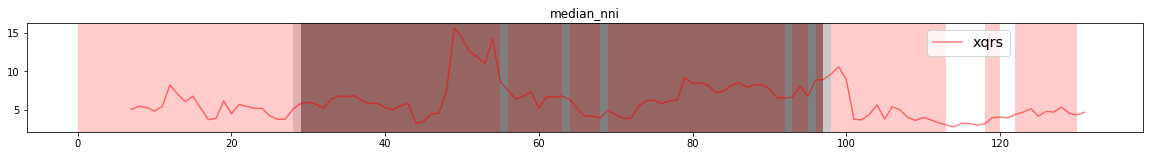

In [28]:
XQRS_FEATS_FILE = "../feats-v0_4/dev/01_tcp_ar/095/00009578/s011_2013_08_13/00009578_s011_t002-xqrs.json"

xqrs_data = json.load(open(XQRS_FEATS_FILE, "r"))
xqrs_features = np.array(xqrs_data["features"])
xqrs_features_tp = np.transpose(xqrs_features)

plt.figure(1, figsize = (20,2))
plt.title(xqrs_data["keys"][10])
plt.plot(xqrs_features_tp[22], color='red', alpha=0.5, label="xqrs")
plt.legend(bbox_to_anchor=(0.80, 1), loc='upper left', fontsize='x-large')

for j in range(0, len(xqrs_features_tp[29])):
    plt.axvspan(j, (j + 1), facecolor='black', alpha=0.5 * xqrs_features_tp[29][j])
    plt.axvspan(j, (j + 1), facecolor='red', alpha=0.2 * preds[j])
plt.plot()
plt.show()

(-0.05, 1.05)

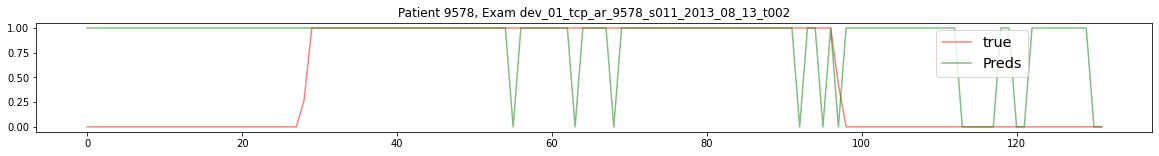

In [29]:
plt.figure(1, figsize = (20,2))

plt.title('Patient 9578, Exam %s' % test_exam[4])
plt.plot(xqrs_features_tp[29], color='red', alpha=0.5, label="true")
plt.plot(preds, color='green', alpha=0.5, label="Preds")
plt.legend(bbox_to_anchor=(0.80, 1), loc='upper left', fontsize='x-large')
plt.ylim()

### 2nd test -> 60 lag

In [30]:
test_data_lag = xqrs_clean_lag_60[(xqrs_clean_lag_60.Key.str.contains('9578'))]

In [31]:
test_data_lag = test_data_lag[~test_data_lag.Key.isin(test_exam)]

In [32]:
test_data_lag.shape

(1857, 107)

In [33]:
test_data_lag

,Key,hf(t-6),lf_hf_ratio(t-6),vlf(t-6),max_hr(t-6),lf(t-6),cvi(t-6),sd1(t-6),min_hr(t-6),sd2(t-6),sampen(t-6),median_nni(t-6),mean_hr(t-6),mean_nni(t-6),csi(t-6),Modified_csi(t-6),hf(t-5),lf_hf_ratio(t-5),vlf(t-5),max_hr(t-5),lf(t-5),cvi(t-5),sd1(t-5),min_hr(t-5),sd2(t-5),sampen(t-5),median_nni(t-5),mean_hr(t-5),mean_nni(t-5),csi(t-5),Modified_csi(t-5),hf(t-4),lf_hf_ratio(t-4),vlf(t-4),max_hr(t-4),lf(t-4),cvi(t-4),sd1(t-4),min_hr(t-4),sd2(t-4),sampen(t-4),median_nni(t-4),mean_hr(t-4),mean_nni(t-4),csi(t-4),Modified_csi(t-4),hf(t-3),lf_hf_ratio(t-3),vlf(t-3),max_hr(t-3),...,mean_hr(t-3),mean_nni(t-3),csi(t-3),Modified_csi(t-3),hf(t-2),lf_hf_ratio(t-2),vlf(t-2),max_hr(t-2),lf(t-2),cvi(t-2),sd1(t-2),min_hr(t-2),sd2(t-2),sampen(t-2),median_nni(t-2),mean_hr(t-2),mean_nni(t-2),csi(t-2),Modified_csi(t-2),hf(t-1),lf_hf_ratio(t-1),vlf(t-1),max_hr(t-1),lf(t-1),cvi(t-1),sd1(t-1),min_hr(t-1),sd2(t-1),sampen(t-1),median_nni(t-1),mean_hr(t-1),mean_nni(t-1),csi(t-1),Modified_csi(t-1),hf(t),lf_hf_ratio(t),vlf(t),max_hr(t),lf(t),cvi(t),sd1(t),min_hr(t),sd2(t),sampen(t),median_nni(t),mean_hr(t),mean_nni(t),csi(t),Modified_csi(t),label
23312,dev_01_tcp_ar_9578_s029_2013_08_23_t003,1.903058,4.740258,5.258661,104.489796,8.662324,2.331578,2.231727,97.834395,6.831398,0.465134,609.37500,98.918721,606.689453,3.435316,93.328734,1.903058,4.740258,5.258661,100.392157,8.662324,2.331578,2.231727,99.096774,6.831398,0.465134,601.56250,99.589346,602.481618,3.435316,93.328734,1.903058,4.740258,5.258661,100.392157,8.662324,2.331578,2.231727,99.740260,6.831398,0.465134,601.56250,99.903234,600.585938,3.435316,93.328734,1.903058,4.740258,5.258661,106.666667,...,101.033206,593.979779,3.435316,93.328734,1.903058,4.740258,5.258661,100.392157,8.662324,2.331578,2.231727,99.096774,6.831398,0.465134,601.56250,99.665545,602.022059,3.435316,93.328734,1.903058,4.740258,5.258661,101.052632,8.662324,2.331578,2.231727,100.392157,6.831398,0.465134,593.75000,100.887513,594.726562,3.435316,93.328734,1.903058,4.740258,5.258661,105.205479,8.662324,2.331578,2.231727,99.096774,6.831398,0.465134,601.56250,100.026879,599.954044,3.435316,93.328734,0
23313,dev_01_tcp_ar_9578_s029_2013_08_23_t003,1.903058,4.740258,5.258661,100.392157,8.662324,2.331578,2.231727,99.096774,6.831398,0.465134,601.56250,99.589346,602.481618,3.435316,93.328734,1.903058,4.740258,5.258661,100.392157,8.662324,2.331578,2.231727,99.740260,6.831398,0.465134,601.56250,99.903234,600.585938,3.435316,93.328734,1.903058,4.740258,5.258661,106.666667,8.662324,2.331578,2.231727,100.392157,6.831398,0.465134,597.65625,101.033206,593.979779,3.435316,93.328734,1.903058,4.740258,5.258661,100.392157,...,99.665545,602.022059,3.435316,93.328734,1.903058,4.740258,5.258661,101.052632,8.662324,2.331578,2.231727,100.392157,6.831398,0.465134,593.75000,100.887513,594.726562,3.435316,93.328734,1.903058,4.740258,5.258661,105.205479,8.662324,2.331578,2.231727,99.096774,6.831398,0.465134,601.56250,100.026879,599.954044,3.435316,93.328734,1.903058,4.740258,5.258661,99.740260,8.662324,2.406860,2.516635,98.461538,6.337526,0.375970,605.46875,98.898779,606.689453,2.518254,63.838009,0
23314,dev_01_tcp_ar_9578_s029_2013_08_23_t003,1.903058,4.740258,5.258661,100.392157,8.662324,2.331578,2.231727,99.740260,6.831398,0.465134,601.56250,99.903234,600.585938,3.435316,93.328734,1.903058,4.740258,5.258661,106.666667,8.662324,2.331578,2.231727,100.392157,6.831398,0.465134,597.65625,101.033206,593.979779,3.435316,93.328734,1.903058,4.740258,5.258661,100.392157,8.662324,2.331578,2.231727,99.096774,6.831398,0.465134,601.56250,99.665545,602.022059,3.435316,93.328734,1.903058,4.740258,5.258661,101.052632,...,100.887513,594.726562,3.435316,93.328734,1.903058,4.740258,5.258661,105.205479,8.662324,2.331578,2.231727,99.096774,6.831398,0.465134,601.56250,100.026879,599.954044,3.435316,93.328734,1.903058,4.740258,5.258661,99.740260,8.662324,2.406860,2.516635,98.461538,6.337526,0.375970,605.46875,98.898779,606.689453,2.518254,63.838009,1.903058,4.740258,5.258661,103.0872

In [34]:
model = simple_ml_no_train(test_data_lag, DecisionTreeClassifier())

In [35]:
for i in range(0, 5):
    preds = model.predict(xqrs_clean_lag_60[xqrs_clean_lag_60.Key == test_exam[i]].iloc[:, 1:-1])
    print(f1_score(xqrs_clean_lag_60[xqrs_clean_lag_60.Key == test_exam[i]].label, preds))

0.1111111111111111
0.1758241758241758
0.2765957446808511
0.6735751295336788
0.7380952380952381


In [36]:
len(xqrs_features_tp[29])

132

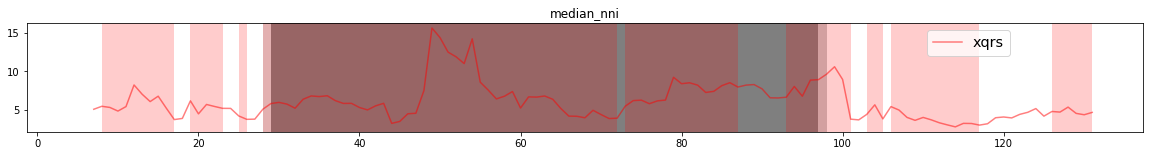

In [37]:
XQRS_FEATS_FILE = "../feats-v0_4/dev/01_tcp_ar/095/00009578/s011_2013_08_13/00009578_s011_t002-xqrs.json"

xqrs_data = json.load(open(XQRS_FEATS_FILE, "r"))
xqrs_features = np.array(xqrs_data["features"])
xqrs_features_tp = np.transpose(xqrs_features)

plt.figure(1, figsize = (20,2))
plt.title(xqrs_data["keys"][10])
plt.plot(xqrs_features_tp[22], color='red', alpha=0.5, label="xqrs")
plt.legend(bbox_to_anchor=(0.80, 1), loc='upper left', fontsize='x-large')

for j, z in zip(range(5, len(xqrs_features_tp[29])), range(0, len(preds))):
    plt.axvspan(j, (j + 1), facecolor='black', alpha=0.5 * xqrs_features_tp[29][j])
    plt.axvspan(j, (j + 1), facecolor='red', alpha=0.2 * preds[z])
plt.plot()
plt.show()

(-0.05, 1.05)

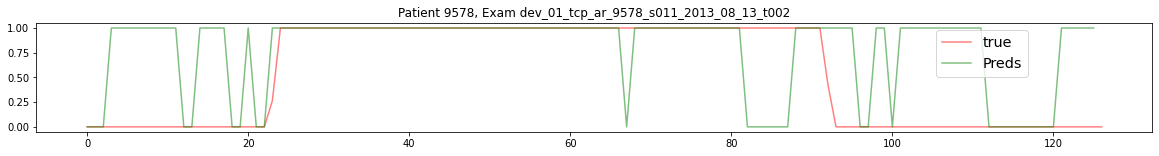

In [38]:
plt.figure(1, figsize = (20,2))

plt.title('Patient 9578, Exam %s' % test_exam[4])
plt.plot(xqrs_features_tp[29][5:], color='red', alpha=0.5, label="true")
plt.plot(preds, color='green', alpha=0.5, label="Preds")
plt.legend(bbox_to_anchor=(0.80, 1), loc='upper left', fontsize='x-large')
plt.ylim()

31 outlier(s) have been deleted.
The outlier(s) value(s) are : [238.28125, 253.90625, 277.34375, 246.09375, 214.84375, 253.90625, 222.65625, 218.75, 296.875, 253.90625, 207.03125, 1968.75, 292.96875, 296.875, 265.625, 296.875, 289.0625, 296.875, 238.28125, 218.75, 273.4375, 246.09375, 214.84375, 214.84375, 265.625, 218.75, 242.1875, 203.125, 238.28125, 265.625, 20054.6875]
28 ectopic beat(s) have been deleted with malik rule.
31 outlier(s) have been deleted.
The outlier(s) value(s) are : [238.28125, 253.90625, 277.34375, 246.09375, 214.84375, 253.90625, 222.65625, 218.75, 296.875, 253.90625, 207.03125, 1968.75, 292.96875, 296.875, 265.625, 296.875, 289.0625, 296.875, 238.28125, 218.75, 273.4375, 246.09375, 214.84375, 214.84375, 265.625, 218.75, 242.1875, 203.125, 238.28125, 265.625, 20054.6875]
52 ectopic beat(s) have been deleted with acar rule.


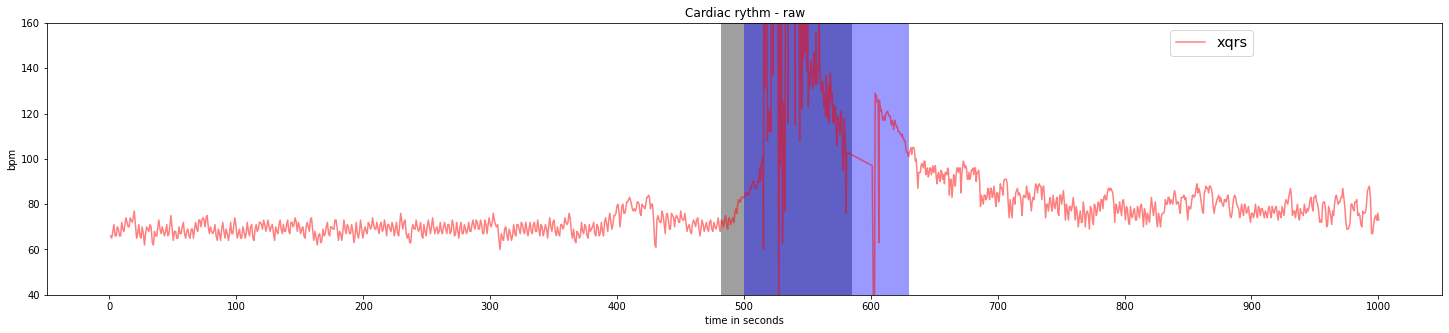

In [33]:
import glob
import json
import matplotlib.pyplot as plt
import numpy as np 
import math
import scipy.signal as signal
from hrvanalysis import remove_outliers, remove_ectopic_beats, interpolate_nan_values


def get_clean_intervals(rrs, method="malik"):
    # This remove outliers from signal
    rr_intervals_without_outliers = remove_outliers(rr_intervals=rrs,
                                                    low_rri=300, high_rri=1800)
    # This replace outliers nan values with linear interpolation
    interpolated_rr_intervals = interpolate_nan_values(rr_intervals=rr_intervals_without_outliers,
                                                       interpolation_method="linear")

    # This remove ectopic beats from signal
    nn_intervals_list = remove_ectopic_beats(rr_intervals=interpolated_rr_intervals, method=method)
    # This replace ectopic beats nan values with linear interpolation
    interpolated_nn_intervals = interpolate_nan_values(rr_intervals=nn_intervals_list)
    return interpolated_nn_intervals

def to_hr(rr_intervals):
    hr = np.zeros(len(rr_intervals))
    for i in range(0, len(rr_intervals)):
        if math.isnan(rr_intervals[i]):
            hr[i] = np.nan
        else:
            hr[i] = (int)(60 * 1000 / rr_intervals[i])

    return hr

ECG_FILE ="../res-v0_4/dev/01_tcp_ar/095/00009578/s004_2013_03_01/00009578_s004_t001.json"
ANNOTATIONS_FILE = "../annot-v0_4/dev/01_tcp_ar/095/00009578/s004_2013_03_01/00009578_s004_t001.json"

try:
    data = json.load(open(ECG_FILE, "r"))
    annotations = json.load(open(ANNOTATIONS_FILE, "r"))

    timestamps = {}
    timestamps["xqrs"] = []

    for key in timestamps.keys():
        timestamps[key] = np.cumsum(data[key]["rr_intervals"][1:])
        timestamps[key] = np.append(timestamps[key], timestamps[key][-2])
        timestamps[key] *= 0.001


    clean_rr_intervals = {}
    clean_rr_intervals["xqrs"] = get_clean_intervals(data["xqrs"]["rr_intervals"])

    clean_hr = {}
    clean_hr["xqrs"] = to_hr(clean_rr_intervals["xqrs"])

    hr_median ={}
    hr_median["xqrs"] = signal.medfilt(clean_hr["xqrs"], 5)

    clean_rr_intervals_acar = {}
    clean_rr_intervals_acar["xqrs"] = get_clean_intervals(data["xqrs"]["rr_intervals"], method="acar")

    clean_hr_acar = {}
    clean_hr_acar["xqrs"] = to_hr(clean_rr_intervals_acar["xqrs"])
    
    #Raw RR intervals
    plt.figure(1, figsize = (25,5))
    plt.ylim((40, 160))
    plt.title("Cardiac rythm - raw")
    plt.xlabel("time in seconds")
    plt.ylabel("bpm")
    plt.xticks(np.arange(0, 1001, 100))
    plt.plot(timestamps["xqrs"], data["xqrs"]["hr"], color='red', alpha=0.5, label="xqrs")
    for seizure in annotations["seizure"]:
        plt.axvspan(seizure[0], seizure[1], facecolor='grey', alpha=0.5)
    plt.legend(bbox_to_anchor=(0.80, 1), loc='upper left', fontsize='x-large')

    for seizure in annotations["seizure"]:
        plt.axvspan(seizure[0], seizure[1], facecolor='grey', alpha=0.5)

    for z, j in enumerate(range(50, len(preds)*10, 10)):
        plt.axvspan(j, (j + 10), facecolor='blue', alpha=0.4 * preds[z])
    plt.legend(bbox_to_anchor=(0.80, 1), loc='upper left', fontsize='x-large')
    plt.show()
except Exception as e:
    print(e)
    print("Error")

In [34]:
'''
    # Clean  RR intervals with Acar method
    plt.figure(1, figsize = (20,5))
    plt.ylim((40, 160))
    plt.title("Cardiac rythm - ACAR cleaning method")
    plt.xlabel("time in seconds")
    plt.ylabel("bpm")
    plt.plot(timestamps["xqrs"], clean_hr_acar["xqrs"], color='red', alpha=0.5, label="xqrs")
    for seizure in annotations["seizure"]:
        plt.axvspan(seizure[0], seizure[1], facecolor='grey', alpha=0.5)
    plt.legend(bbox_to_anchor=(0.80, 1), loc='upper left', fontsize='x-large')
    plt.show()
    
    # Clean RR intervals with Malik + median filter
    plt.figure(1, figsize = (20,5))
    plt.ylim((40, 160))
    plt.title("Cardiac rythm - Malik cleaning method + median filter")
    plt.xlabel("time in seconds")
    plt.ylabel("bpm")
    plt.plot(timestamps["xqrs"], hr_median["xqrs"], color='red', alpha=0.5, label="xqrs")
'''

'\n    # Clean  RR intervals with Acar method\n    plt.figure(1, figsize = (20,5))\n    plt.ylim((40, 160))\n    plt.title("Cardiac rythm - ACAR cleaning method")\n    plt.xlabel("time in seconds")\n    plt.ylabel("bpm")\n    plt.plot(timestamps["xqrs"], clean_hr_acar["xqrs"], color=\'red\', alpha=0.5, label="xqrs")\n    for seizure in annotations["seizure"]:\n        plt.axvspan(seizure[0], seizure[1], facecolor=\'grey\', alpha=0.5)\n    plt.legend(bbox_to_anchor=(0.80, 1), loc=\'upper left\', fontsize=\'x-large\')\n    plt.show()\n    \n    # Clean RR intervals with Malik + median filter\n    plt.figure(1, figsize = (20,5))\n    plt.ylim((40, 160))\n    plt.title("Cardiac rythm - Malik cleaning method + median filter")\n    plt.xlabel("time in seconds")\n    plt.ylabel("bpm")\n    plt.plot(timestamps["xqrs"], hr_median["xqrs"], color=\'red\', alpha=0.5, label="xqrs")\n'

## Patient X

### 1. test no lag

In [39]:
patient = '9578'

In [40]:
from functions import simple_ml
from sklearn.ensemble import RandomForestClassifier

In [41]:
np.arange(50, 201, 25)

array([ 50,  75, 100, 125, 150, 175, 200])

In [42]:
params = {
    'classifier__criterion': ['gini', 'entropy'],
    'classifier__n_estimators': [50, 100, 150],
    'classifier__max_depth': [2, 8, 15, None],
    'classifier__min_samples_split': [3, 7],
    'classifier__min_samples_leaf': [2, 4, 6],
    'classifier__class_weight': [{0:0.3, 1:0.7}, {0:0.2, 1:0.8}]
}

Fitting 5 folds for each of 288 candidates, totalling 1440 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:   11.7s
[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed:   23.0s
[Parallel(n_jobs=-1)]: Done 1226 tasks      | elapsed:   35.1s
[Parallel(n_jobs=-1)]: Done 1440 out of 1440 | elapsed:   43.0s finished
0.3508771929824561


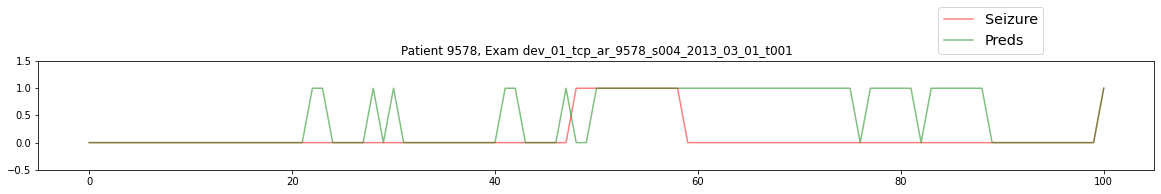

0.14414414414414417


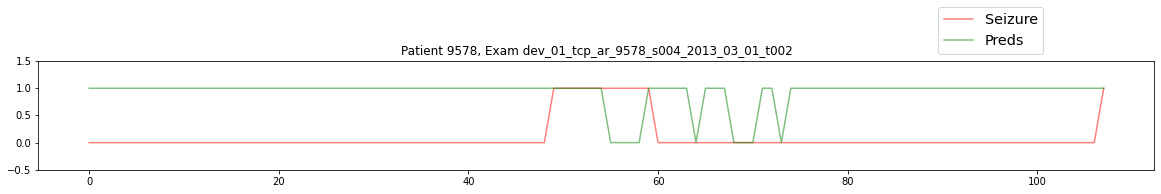

0.2857142857142857


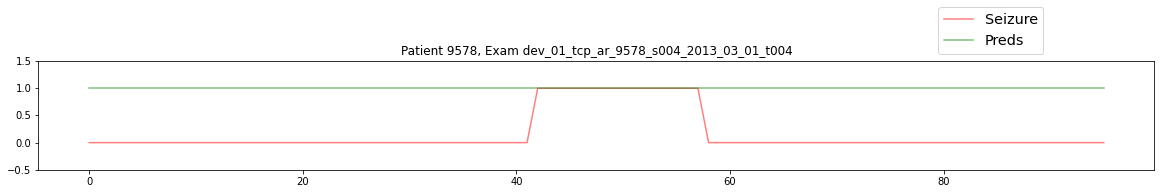

0.6103286384976526


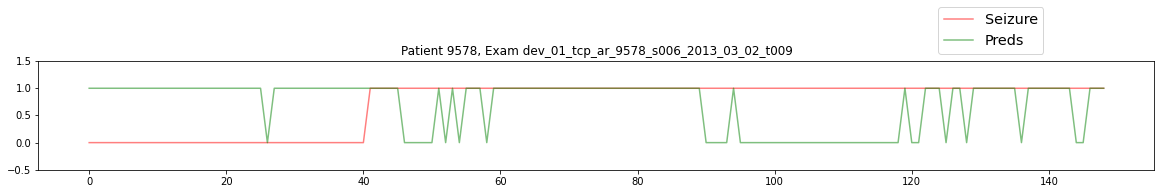

0.6965174129353234


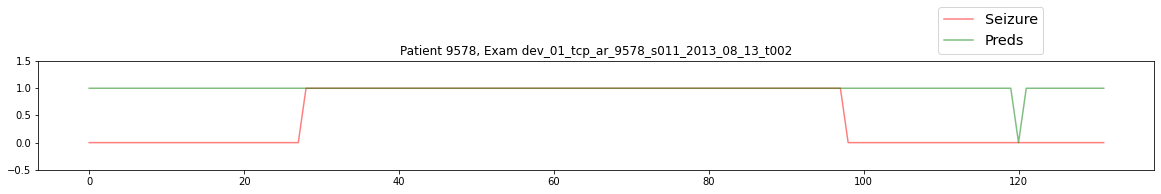

In [43]:
test_exam = xqrs_clean_imputed[xqrs_clean_imputed.Key.str.contains(patient)].groupby('Key').agg('count').index.tolist()[:5]

test_data = xqrs_clean_imputed[(xqrs_clean_imputed.Key.str.contains(patient))]
test_data = test_data[~test_data.Key.isin(test_exam)]

score, model = simple_ml(test_data, RandomForestClassifier(), params, grid=True)

for i in range(0, 5):
    preds = model.predict(xqrs_clean_imputed[xqrs_clean_imputed.Key == test_exam[i]].iloc[:, 1:-1])
    print(f1_score(xqrs_clean_imputed[xqrs_clean_imputed.Key == test_exam[i]].label, preds))


    plt.figure(1, figsize = (20,2))
    plt.title('Patient %s, Exam %s' % (patient, test_exam[i]))
    plt.plot(xqrs_clean_imputed[xqrs_clean_imputed.Key == test_exam[i]].label.tolist(), 
                color='red', alpha=0.5, label="Seizure")
    plt.plot(preds, color='green', alpha=0.5, label="Preds")
    plt.legend(bbox_to_anchor=(0.80, 1), loc='best', fontsize='x-large')
    plt.ylim((-0.5, 1.5))
    plt.show()

In [44]:
params = {
        'classifier__min_child_weight': [1, 2],
        'classifier__gamma': [0.4, 0.5, 0.6],
        'classifier__subsample': [0.9, 1.0, 1.1],
        'classifier__colsample_bytree': [0.75, 0.8, 0.85],
        'classifier__max_depth': [8, 10, 12]
        }

Fitting 5 folds for each of 162 candidates, totalling 810 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 328 tasks      | elapsed:    6.1s
[Parallel(n_jobs=-1)]: Done 787 out of 810 | elapsed:   14.8s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done 810 out of 810 | elapsed:   15.1s finished
0.3448275862068966


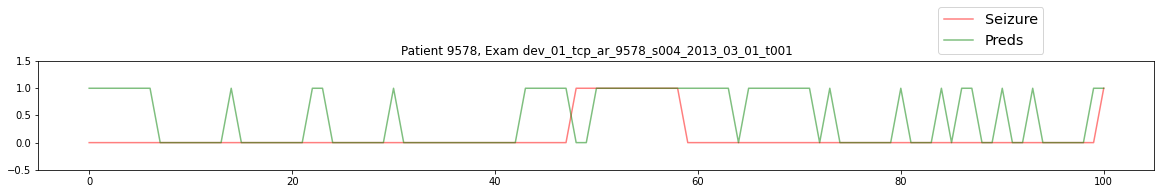

0.21428571428571425


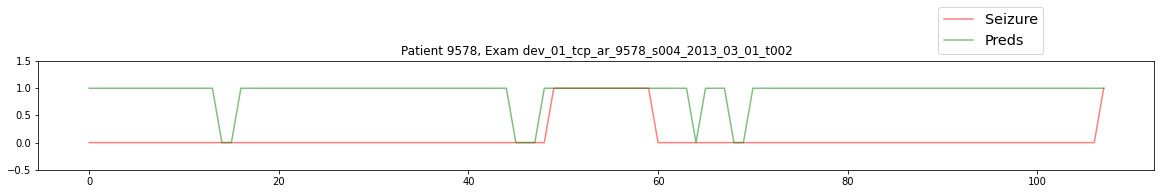

0.29357798165137616


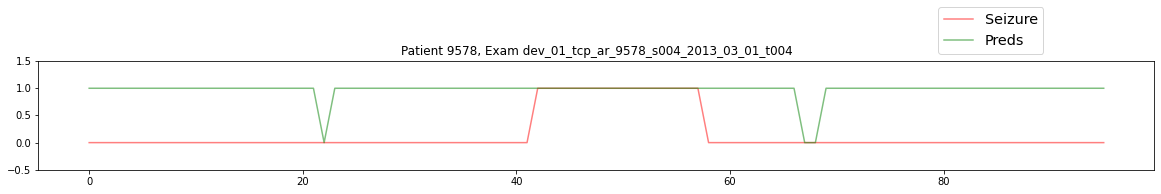

0.53


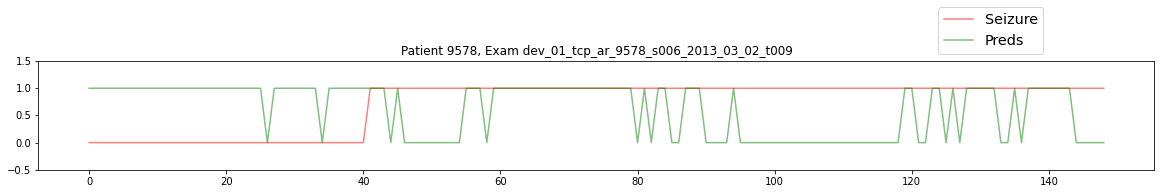

0.6666666666666667


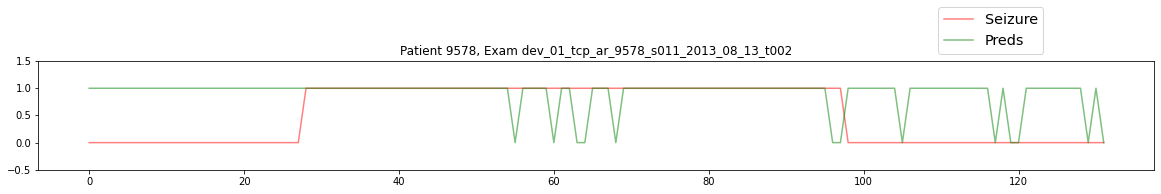

In [45]:
test_exam = xqrs_clean_imputed[xqrs_clean_imputed.Key.str.contains(patient)].groupby('Key').agg('count').index.tolist()[:5]

test_data = xqrs_clean_imputed[(xqrs_clean_imputed.Key.str.contains(patient))]
test_data = test_data[~test_data.Key.isin(test_exam)]

score, model = simple_ml(test_data, XGBClassifier(n_jobs=-1), params, grid=True)

for i in range(0, 5):
    preds = model.predict(xqrs_clean_imputed[xqrs_clean_imputed.Key == test_exam[i]].iloc[:, 1:-1])
    print(f1_score(xqrs_clean_imputed[xqrs_clean_imputed.Key == test_exam[i]].label, preds))


    plt.figure(1, figsize = (20,2))
    plt.title('Patient %s, Exam %s' % (patient, test_exam[i]))
    plt.plot(xqrs_clean_imputed[xqrs_clean_imputed.Key == test_exam[i]].label.tolist(), 
                color='red', alpha=0.5, label="Seizure")
    plt.plot(preds, color='green', alpha=0.5, label="Preds")
    plt.legend(bbox_to_anchor=(0.80, 1), loc='best', fontsize='x-large')
    plt.ylim((-0.5, 1.5))
    plt.show()

Fitting 5 folds for each of 162 candidates, totalling 810 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   15.1s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:   35.9s
[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 810 out of 810 | elapsed:  1.2min finished
0.28571428571428575


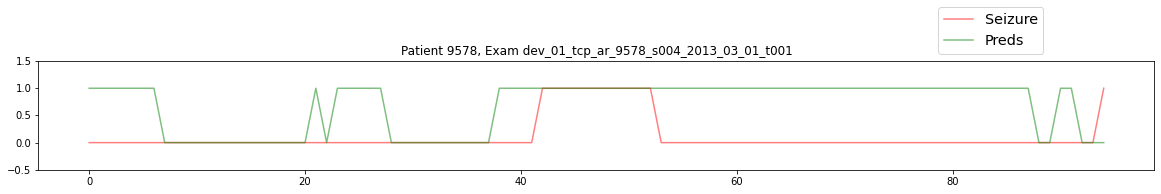

0.21428571428571425


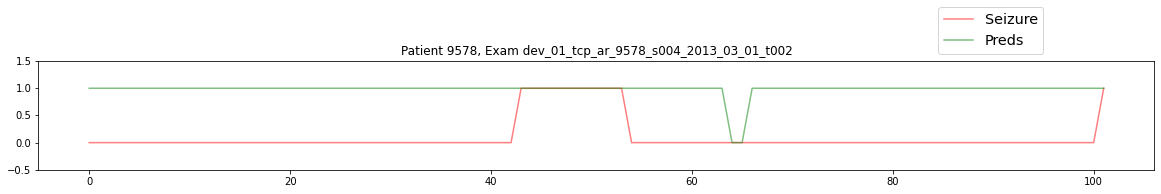

0.3076923076923077


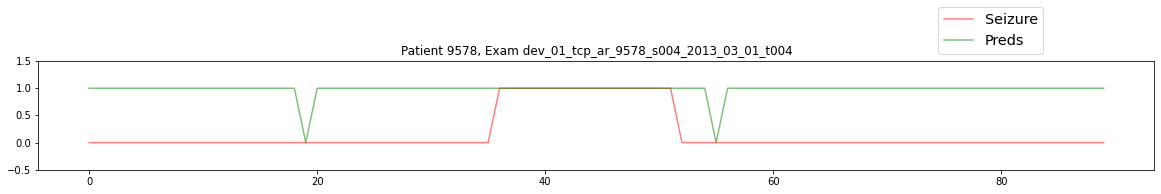

0.6183574879227053


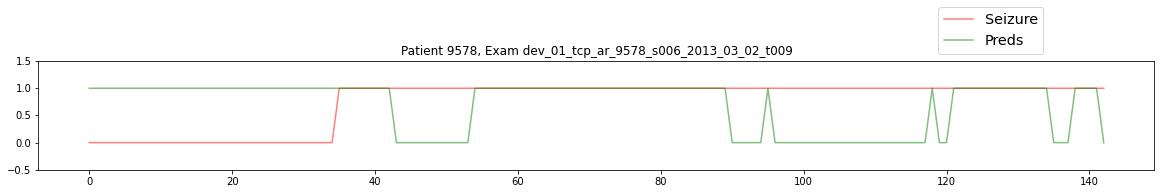

0.717948717948718


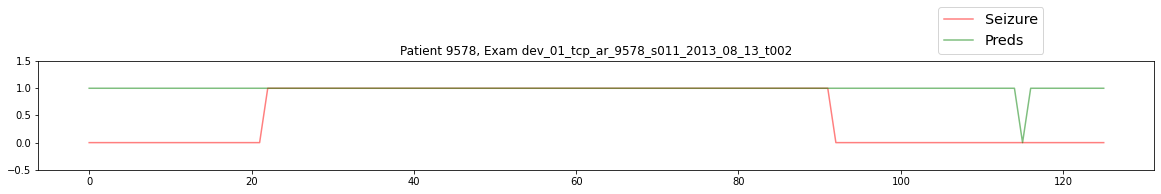

In [47]:
test_exam = xqrs_clean_imputed[xqrs_clean_imputed.Key.str.contains(patient)].groupby('Key').agg('count').index.tolist()[:5]

dataset = xqrs_clean_lag_60

test_data_lag = dataset[(dataset.Key.str.contains(patient))]
test_data_lag = test_data_lag[~test_data_lag.Key.isin(test_exam)]

score, model = simple_ml(test_data_lag, XGBClassifier(), params, grid=True)

for i in range(0, 5):
    preds = model.predict(dataset[dataset.Key == test_exam[i]].iloc[:, 1:-1])
    print(f1_score(dataset[dataset.Key == test_exam[i]].label, preds))

    plt.figure(1, figsize = (20,2))
    plt.title('Patient %s, Exam %s' % (patient, test_exam[i]))
    plt.plot(dataset[dataset.Key == test_exam[i]].label.tolist(), color='red', alpha=0.5, label="Seizure")
    plt.plot(preds, color='green', alpha=0.5, label="Preds")
    plt.legend(bbox_to_anchor=(0.80, 1), loc='best', fontsize='x-large')
    plt.ylim((-0.5, 1.5))
    plt.show()

0.25


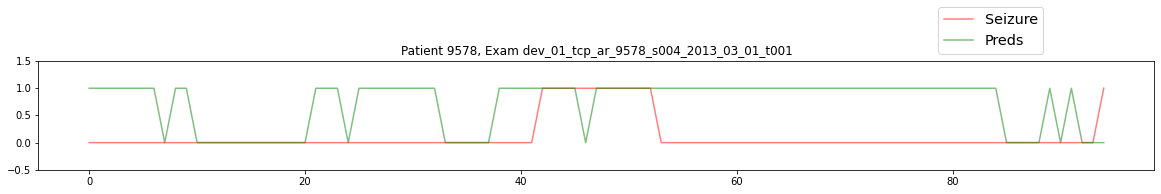

0.21621621621621626


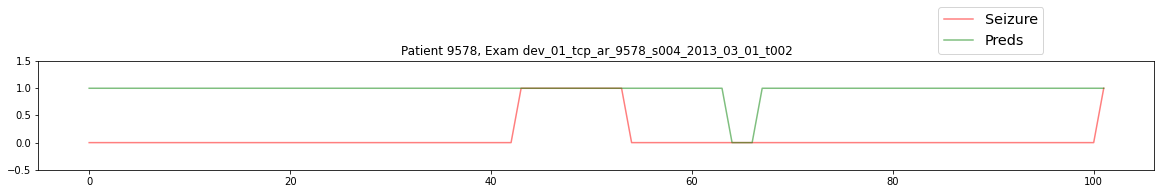

0.3106796116504854


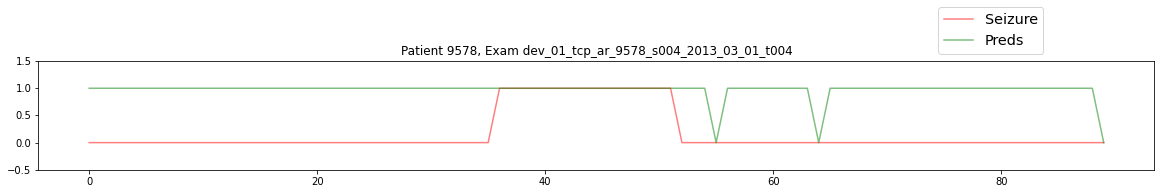

0.5980392156862745


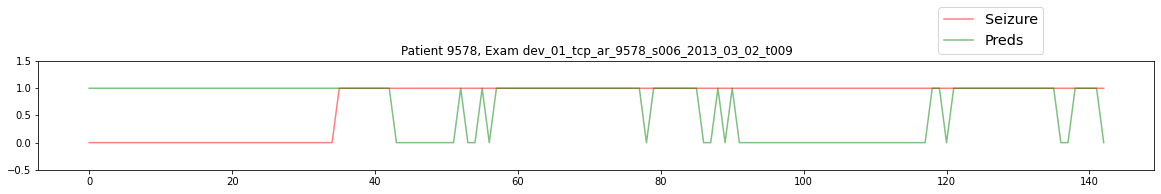

0.7142857142857143


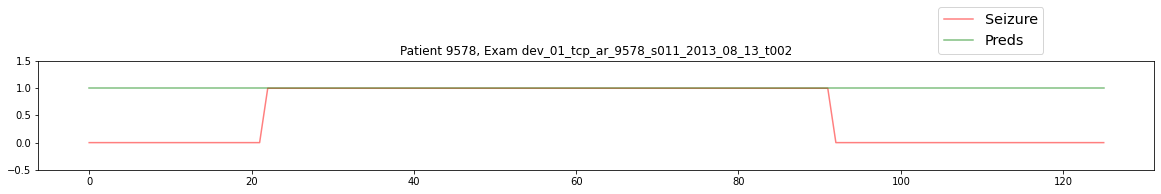

In [48]:
test_exam = xqrs_clean_imputed[xqrs_clean_imputed.Key.str.contains(patient)].groupby('Key').agg('count').index.tolist()[:5]

dataset = xqrs_clean_lag_60

test_data_lag = dataset[(dataset.Key.str.contains(patient))]
test_data_lag = test_data_lag[~test_data_lag.Key.isin(test_exam)]

score, model = simple_ml(test_data_lag, XGBClassifier())

for i in range(0, 5):
    preds = model.predict(dataset[dataset.Key == test_exam[i]].iloc[:, 1:-1])
    print(f1_score(dataset[dataset.Key == test_exam[i]].label, preds))

    plt.figure(1, figsize = (20,2))
    plt.title('Patient %s, Exam %s' % (patient, test_exam[i]))
    plt.plot(dataset[dataset.Key == test_exam[i]].label.tolist(), color='red', alpha=0.5, label="Seizure")
    plt.plot(preds, color='green', alpha=0.5, label="Preds")
    plt.legend(bbox_to_anchor=(0.80, 1), loc='best', fontsize='x-large')
    plt.ylim((-0.5, 1.5))
    plt.show()